# ▶ EDA

In [3]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandas display behaviour
pd.set_option('display.max_columns', None)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
internal = pd.read_excel('data/case_study1.xlsx')
external = pd.read_excel('data/case_study2.xlsx')

In [5]:
df1, df2 = internal.copy(), external.copy()

## df1

In [6]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [7]:
print('Shape:', df1.shape, f'| Rows: {df1.shape[0]}, Columns: {df1.shape[1]}')

Shape: (51336, 26) | Rows: 51336, Columns: 26


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [9]:
df1.columns = [col.lower() for col in df1.columns]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prospectid            51336 non-null  int64  
 1   total_tl              51336 non-null  int64  
 2   tot_closed_tl         51336 non-null  int64  
 3   tot_active_tl         51336 non-null  int64  
 4   total_tl_opened_l6m   51336 non-null  int64  
 5   tot_tl_closed_l6m     51336 non-null  int64  
 6   pct_tl_open_l6m       51336 non-null  float64
 7   pct_tl_closed_l6m     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  total_tl_opened_l12m  51336 non-null  int64  
 11  tot_tl_closed_l12m    51336 non-null  int64  
 12  pct_tl_open_l12m      51336 non-null  float64
 13  pct_tl_closed_l12m    51336 non-null  float64
 14  tot_missed_pmnt       51336 non-null  int64  
 15  auto_tl            

whereever we see -99999 in age_oldest/newest_tl it's basically null value! Let's remove that.

In [11]:
df1 = df1[df1['age_oldest_tl'] != -99999]

In [12]:
print('Shape:', df1.shape, f'| Rows: {df1.shape[0]}, Columns: {df1.shape[1]}')

Shape: (51296, 26) | Rows: 51296, Columns: 26


## df2

In [13]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [14]:
print('Shape:', df2.shape, f'| Rows: {df2.shape[0]}, Columns: {df2.shape[1]}')

Shape: (51336, 62) | Rows: 51336, Columns: 62


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [16]:
df2.columns = [col.lower() for col in df2.columns]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   prospectid                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

there are various columns having -99999 (null) values. If any column have >10000 such values let's remove the column.|

In [18]:
columns_to_be_removed = []

for col in df2.columns:
    if df2.loc[df2[col] == -99999].shape[0] > 10000:
        columns_to_be_removed.append(col)

print(f'All features to be removed ({len(columns_to_be_removed)}): {columns_to_be_removed}')

All features to be removed (8): ['time_since_first_deliquency', 'time_since_recent_deliquency', 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'cc_utilization', 'pl_utilization', 'max_unsec_exposure_inpct']


In [19]:
df2 = df2.drop(columns_to_be_removed, axis =1)

for the columns left, it it has value -99999. Let's just remove that row.

In [20]:
for col in df2.columns:
    df2 = df2.loc[df2[col] != -99999]

In [21]:
print('Shape:', df2.shape, f'| Rows: {df2.shape[0]}, Columns: {df2.shape[1]}')

Shape: (42066, 54) | Rows: 42066, Columns: 54


let's merge the two datasets on common columns:

In [22]:
common_features = [feature for feature in df1.columns if feature in df2.columns]
print(f'All common features ({len(common_features)}): {common_features}')

All common features (1): ['prospectid']


## merged

In [23]:
df = pd.merge(df1, df2, how ='inner', left_on = ['prospectid'], right_on = ['prospectid'])

In [24]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (42064, 79) | Rows: 42064, Columns: 79


In [25]:
df.isnull().sum().sum()

0

no null values left!

In [26]:
df.duplicated().sum()

0

no duplicate values!

In [27]:
all_features = list(df.columns)
print('>>> All features:', all_features)

>>> All features: ['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl', 'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m', 'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl', 'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m', 'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'cc_enq', 'cc_enq_l6m', 'cc_enq_l12m', 'pl_enq', 'pl_enq_l6m', 'pl_enq_l12m', 'time_since_recent_enq', 'enq_l12m', 'enq_l6m', 'enq_l3m', 'maritalstatus', 'educa

In [28]:
dependent_feature = ['approved_flag']
independent_features = [feature for feature in all_features if feature not in dependent_feature]

print('>>> All independent_features: \n', independent_features)

>>> All independent_features: 
 ['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl', 'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m', 'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl', 'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m', 'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'cc_enq', 'cc_enq_l6m', 'cc_enq_l12m', 'pl_enq', 'pl_enq_l6m', 'pl_enq_l12m', 'time_since_recent_enq', 'enq_l12m', 'enq_l6m', 'enq_l3m', 'maritals

In [29]:
# Check unique categories in features with less than or equal to 10 unique values
for feature in all_features:
    if len(df[feature].unique()) <= 10:
        print(f'>> Unique categories in {feature}: \n', df[feature].unique(), '\n')

>> Unique categories in home_tl: 
 [ 0  1  2  3  4 10  5  6  7] 

>> Unique categories in num_sub_6mts: 
 [0 1 3 5 2 4] 

>> Unique categories in num_dbt_6mts: 
 [0 4 5 2 3 6] 

>> Unique categories in num_lss_6mts: 
 [ 0  4  3  5 12  2  1] 

>> Unique categories in maritalstatus: 
 ['Married' 'Single'] 

>> Unique categories in education: 
 ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL'] 

>> Unique categories in gender: 
 ['M' 'F'] 

>> Unique categories in cc_flag: 
 [0 1] 

>> Unique categories in pl_flag: 
 [1 0] 

>> Unique categories in hl_flag: 
 [1 0] 

>> Unique categories in gl_flag: 
 [0 1] 

>> Unique categories in last_prod_enq2: 
 ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL'] 

>> Unique categories in first_prod_enq2: 
 ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC'] 

>> Unique categories in approved_flag: 
 ['P2' 'P1' 'P3' 'P4'] 



In [30]:
cat_features = [feature for feature in independent_features if df[feature].dtype == 'O']
num_features = [feature for feature in independent_features if feature not in cat_features + ['prospectid']]

In [31]:
len(df.columns), (len(cat_features) + len(num_features) + 2) # +1 for Id, +1 for dependent_feature

(79, 79)

In [32]:
print('>>> All Categorical features: \n', cat_features)
print('\n>>> All Numerical features: \n', num_features)

>>> All Categorical features: 
 ['maritalstatus', 'education', 'gender', 'last_prod_enq2', 'first_prod_enq2']

>>> All Numerical features: 
 ['total_tl', 'tot_closed_tl', 'tot_active_tl', 'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m', 'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl', 'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m', 'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'cc_enq', 'cc_enq_l6m', 'cc_enq_l12m', 'pl_enq', 'p

In [33]:
# Check unique categories in features with less than or equal to 10 unique values
for feature in cat_features:
    if len(df[feature].unique()) <= 10:
        print(f'>> Unique categories in {feature}: \n', df[feature].unique(), '\n')

>> Unique categories in maritalstatus: 
 ['Married' 'Single'] 

>> Unique categories in education: 
 ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL'] 

>> Unique categories in gender: 
 ['M' 'F'] 

>> Unique categories in last_prod_enq2: 
 ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL'] 

>> Unique categories in first_prod_enq2: 
 ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC'] 



In [34]:
# Check unique categories in features with less than or equal to 10 unique values
for feature in num_features:
    if len(df[feature].unique()) <= 10:
        print(f'>> Unique categories in {feature}: \n', df[feature].unique(), '\n')

>> Unique categories in home_tl: 
 [ 0  1  2  3  4 10  5  6  7] 

>> Unique categories in num_sub_6mts: 
 [0 1 3 5 2 4] 

>> Unique categories in num_dbt_6mts: 
 [0 4 5 2 3 6] 

>> Unique categories in num_lss_6mts: 
 [ 0  4  3  5 12  2  1] 

>> Unique categories in cc_flag: 
 [0 1] 

>> Unique categories in pl_flag: 
 [1 0] 

>> Unique categories in hl_flag: 
 [1 0] 

>> Unique categories in gl_flag: 
 [0 1] 



For the categorical features, let's check which of them are closely associated with the target (dependent) feature using chi_sq test:

In [35]:
from scipy.stats import chi2_contingency

In [36]:
for feature in cat_features:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[feature], df[dependent_feature[0]]))
    print(f'[+] Feature: {feature}, pval: {round(pval,4)}' if pval<0.05 else f'[-] Feature: {feature}, pval: {pval}')

[+] Feature: maritalstatus, pval: 0.0
[+] Feature: education, pval: 0.0
[+] Feature: gender, pval: 0.0
[+] Feature: last_prod_enq2, pval: 0.0
[+] Feature: first_prod_enq2, pval: 0.0


We fail to reject the null hypothesis. Let's keep all columns.

for numerical features let's first check multicollinearirty using VIF - Sequential

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif_data = df[num_features]

In [39]:
vif_data.shape

(42064, 72)

In [40]:
columns_to_be_kept = []

column_index = 0
for i in range (vif_data.shape[1]):
    vif_value = variance_inflation_factor(vif_data, column_index)
    # print (f'column_index: {column_index}, vif_value: {vif_value}')

    if vif_value <= 6:
        print(f'[+] {num_features[i]}')
        columns_to_be_kept.append(num_features[i])
        column_index += 1
    else:
        print(f'[-] {num_features[i]}')
        vif_data = vif_data.drop(num_features[i], axis=1)

[-] total_tl
[-] tot_closed_tl
[-] tot_active_tl
[-] total_tl_opened_l6m
[-] tot_tl_closed_l6m
[+] pct_tl_open_l6m
[+] pct_tl_closed_l6m
[-] pct_active_tl
[-] pct_closed_tl
[-] total_tl_opened_l12m
[+] tot_tl_closed_l12m
[-] pct_tl_open_l12m
[+] pct_tl_closed_l12m
[+] tot_missed_pmnt
[-] auto_tl
[+] cc_tl
[-] consumer_tl
[-] gold_tl
[+] home_tl
[+] pl_tl
[+] secured_tl
[+] unsecured_tl
[+] other_tl
[+] age_oldest_tl
[+] age_newest_tl
[+] time_since_recent_payment
[-] num_times_delinquent
[+] max_recent_level_of_deliq
[-] num_deliq_6mts
[-] num_deliq_12mts
[+] num_deliq_6_12mts
[-] num_times_30p_dpd
[+] num_times_60p_dpd
[-] num_std
[-] num_std_6mts
[+] num_std_12mts
[+] num_sub
[+] num_sub_6mts
[+] num_sub_12mts
[+] num_dbt
[-] num_dbt_6mts
[+] num_dbt_12mts
[+] num_lss
[-] num_lss_6mts
[+] num_lss_12mts
[+] recent_level_of_deliq
[-] tot_enq
[-] cc_enq
[-] cc_enq_l6m
[+] cc_enq_l12m
[-] pl_enq
[-] pl_enq_l6m
[+] pl_enq_l12m
[+] time_since_recent_enq
[-] enq_l12m
[-] enq_l6m
[+] enq_l3m

In [41]:
print(f'All columns to be kept ({len(columns_to_be_kept)}):\n {columns_to_be_kept}')

All columns to be kept (39):
 ['pct_tl_open_l6m', 'pct_tl_closed_l6m', 'tot_tl_closed_l12m', 'pct_tl_closed_l12m', 'tot_missed_pmnt', 'cc_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'num_lss_12mts', 'recent_level_of_deliq', 'cc_enq_l12m', 'pl_enq_l12m', 'time_since_recent_enq', 'enq_l3m', 'netmonthlyincome', 'time_with_curr_empr', 'pct_currentbal_all_tl', 'cc_flag', 'pl_flag', 'pct_pl_enq_l6m_of_ever', 'pct_cc_enq_l6m_of_ever', 'hl_flag', 'gl_flag']


In [42]:
vif_data.shape

(42064, 39)

now let's perform Annova on non-multicolliear features to finalize the numerical columns to be kept.

In [43]:
from scipy.stats import f_oneway

In [44]:
retained_num_features = []

for feature in columns_to_be_kept:
    a = list(df[feature])
    b = list(df[dependent_feature[0]])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    print(f'[+] feature: {feature}' if p_value <= 0.05 else f'[-] feature: {feature}')

    if p_value <= 0.05:
        retained_num_features.append(feature)

[+] feature: pct_tl_open_l6m
[+] feature: pct_tl_closed_l6m
[+] feature: tot_tl_closed_l12m
[+] feature: pct_tl_closed_l12m
[+] feature: tot_missed_pmnt
[+] feature: cc_tl
[+] feature: home_tl
[+] feature: pl_tl
[+] feature: secured_tl
[+] feature: unsecured_tl
[+] feature: other_tl
[+] feature: age_oldest_tl
[+] feature: age_newest_tl
[+] feature: time_since_recent_payment
[+] feature: max_recent_level_of_deliq
[+] feature: num_deliq_6_12mts
[+] feature: num_times_60p_dpd
[+] feature: num_std_12mts
[+] feature: num_sub
[+] feature: num_sub_6mts
[+] feature: num_sub_12mts
[+] feature: num_dbt
[+] feature: num_dbt_12mts
[+] feature: num_lss
[-] feature: num_lss_12mts
[+] feature: recent_level_of_deliq
[+] feature: cc_enq_l12m
[+] feature: pl_enq_l12m
[+] feature: time_since_recent_enq
[+] feature: enq_l3m
[+] feature: netmonthlyincome
[+] feature: time_with_curr_empr
[-] feature: pct_currentbal_all_tl
[+] feature: cc_flag
[+] feature: pl_flag
[+] feature: pct_pl_enq_l6m_of_ever
[+] feat

In [45]:
print(f'All num_features to be retained ({len(retained_num_features)}):\n {retained_num_features}')

All num_features to be retained (37):
 ['pct_tl_open_l6m', 'pct_tl_closed_l6m', 'tot_tl_closed_l12m', 'pct_tl_closed_l12m', 'tot_missed_pmnt', 'cc_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'cc_enq_l12m', 'pl_enq_l12m', 'time_since_recent_enq', 'enq_l3m', 'netmonthlyincome', 'time_with_curr_empr', 'cc_flag', 'pl_flag', 'pct_pl_enq_l6m_of_ever', 'pct_cc_enq_l6m_of_ever', 'hl_flag', 'gl_flag']


In [46]:
num_features = retained_num_features

# ▶ Prepare for Training

In [47]:
selected_features = cat_features + num_features

In [48]:
df_selected_features = df[selected_features]

In [49]:
df_selected_features.head()

,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
0,Married,12TH,M,PL,PL,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0
1,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0
2,Married,SSC,M,ConsumerLoan,others,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0
3,Married,POST-GRADUATE,M,AL,AL,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0
4,Married,12TH,M,ConsumerLoan,PL,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0


cat_feature  - 'education' can be LabelEncoded. Let's so that

In [50]:
df_selected_features['education'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [51]:
education_mapping = {
    1: ['SSC', 'OTHERS'],
    2: ['12TH'],
    3: ['UNDER GRADUATE', 'GRADUATE', 'PROFESSIONAL'],
    4: ['POST-GRADUATE']
}

In [52]:
def apply_education_map(education_level: str) -> int:
    for tuned, to_be_tuned in education_mapping.items():
        education_level = tuned if education_level in to_be_tuned else education_level

    return int(education_level)

In [53]:
df_selected_features['education'] = df_selected_features['education'].apply(apply_education_map)

In [54]:
df_selected_features.head()

,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
0,Married,2,M,PL,PL,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0
1,Single,3,F,ConsumerLoan,ConsumerLoan,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0
2,Married,1,M,ConsumerLoan,others,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0
3,Married,4,M,AL,AL,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0
4,Married,2,M,ConsumerLoan,PL,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0


In [55]:
cat_features.remove('education') if 'education' in cat_features else cat_features
cat_features

['maritalstatus', 'gender', 'last_prod_enq2', 'first_prod_enq2']

In [56]:
num_features = num_features if 'education' in num_features else num_features + ['education']
num_features

['pct_tl_open_l6m',
 'pct_tl_closed_l6m',
 'tot_tl_closed_l12m',
 'pct_tl_closed_l12m',
 'tot_missed_pmnt',
 'cc_tl',
 'home_tl',
 'pl_tl',
 'secured_tl',
 'unsecured_tl',
 'other_tl',
 'age_oldest_tl',
 'age_newest_tl',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'cc_enq_l12m',
 'pl_enq_l12m',
 'time_since_recent_enq',
 'enq_l3m',
 'netmonthlyincome',
 'time_with_curr_empr',
 'cc_flag',
 'pl_flag',
 'pct_pl_enq_l6m_of_ever',
 'pct_cc_enq_l6m_of_ever',
 'hl_flag',
 'gl_flag',
 'education']

In [57]:
X, y = df_selected_features, df[dependent_feature[0]]

In [58]:
X.head()

,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
0,Married,2,M,PL,PL,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0
1,Single,3,F,ConsumerLoan,ConsumerLoan,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0
2,Married,1,M,ConsumerLoan,others,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0
3,Married,4,M,AL,AL,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0
4,Married,2,M,ConsumerLoan,PL,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0


In [59]:
y.head()

0    P2
1    P2
2    P2
3    P1
4    P3
Name: approved_flag, dtype: object

In [60]:
mapping = {'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3}

y = y.map(mapping)

In [61]:
y.head()

0    1
1    1
2    1
3    0
4    2
Name: approved_flag, dtype: int64

In [62]:
y.value_counts()

approved_flag
1    25452
2     6440
3     5264
0     4908
Name: count, dtype: int64

Let's do a train_test_split before applying any scaling to avoid data leakage

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
X_train.head()

,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
36744,Single,1,M,ConsumerLoan,AL,0.000,0.0,0,0.0,1,0,0,0,18,0,0,40,9,57,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,23000,95,0,0,0.0,0.0,1,0
41246,Married,3,M,others,others,0.000,0.0,0,0.0,0,0,0,0,1,0,0,21,21,46,0,0,0,0,0,0,0,0,0,0,0,0,0,658,0,18000,129,0,0,0.0,0.0,0,0
1972,Married,2,M,ConsumerLoan,ConsumerLoan,0.000,0.0,0,0.0,0,0,0,0,0,2,0,68,46,1085,0,0,0,0,0,0,0,0,0,0,0,0,0,1379,0,23500,41,0,0,0.0,0.0,0,0
41729,Married,3,M,others,CC,0.286,0.0,0,0.0,0,3,0,0,4,3,1,44,4,39,0,0,0,0,0,0,0,0,0,0,0,0,0,299,0,40000,181,1,0,0.0,0.0,1,0
13401,Married,4,F,ConsumerLoan,PL,0.000,0.0,0,0.0,0,0,0,0,0,2,0,41,33,632,13,0,0,0,0,0,0,0,0,0,13,0,0,6,3,12000,36,0,0,0.0,0.0,0,0


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28182 entries, 36744 to 15795
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maritalstatus              28182 non-null  object 
 1   education                  28182 non-null  int64  
 2   gender                     28182 non-null  object 
 3   last_prod_enq2             28182 non-null  object 
 4   first_prod_enq2            28182 non-null  object 
 5   pct_tl_open_l6m            28182 non-null  float64
 6   pct_tl_closed_l6m          28182 non-null  float64
 7   tot_tl_closed_l12m         28182 non-null  int64  
 8   pct_tl_closed_l12m         28182 non-null  float64
 9   tot_missed_pmnt            28182 non-null  int64  
 10  cc_tl                      28182 non-null  int64  
 11  home_tl                    28182 non-null  int64  
 12  pl_tl                      28182 non-null  int64  
 13  secured_tl                 28182 non-null  int6

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [68]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

In [69]:
df

,prospectid,total_tl,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,total_tl_opened_l12m,tot_tl_closed_l12m,pct_tl_open_l12m,pct_tl_closed_l12m,tot_missed_pmnt,auto_tl,cc_tl,consumer_tl,gold_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,cc_enq,cc_enq_l6m,cc_enq_l12m,pl_enq,pl_enq_l6m,pl_enq_l12m,time_since_recent_enq,enq_l12m,enq_l6m,enq_l3m,maritalstatus,education,age,gender,netmonthlyincome,time_with_curr_empr,pct_of_active_tls_ever,pct_opened_tls_l6m_of_l12m,pct_currentbal_all_tl,cc_flag,pl_flag,pct_pl_enq_l6m_of_l12m,pct_cc_enq_l6m_of_l12m,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag,last_prod_enq2,first_prod_enq2,credit_score,approved_flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,0,0,0.000,0.000,0,0,0,0,1,0,4,1,4,0,72,18,549,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,1,0,1.000,0.000,0,0,0,1,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,2,0,0.250,0.000,1,1,0,6,1,0,0,2,6,0,47,2,302,9,25,1,9,8,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,0,0,0.000,0.000,0,1,0,0,0,0,0,3,0,2,131,32,583,0,0,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,0,1,0.000,0.167,0,4,0,0,2,0,0,6,0,0,150,17,245,14,270,0,0,0,13,11,5,0,2,3,0,1,0,0,0,0,0,0,26,15,2,0,1,7,3,3,7,6,5,4,Married,12TH,35,M,0,154,0.167,0.0,0.000,0,0,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,1,0,0.333,0.000,0,0,0,2,0,0,0,0,3,1,24,5,15,2,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,4,0,0,0,0,0,0,0,3,3,1,Married,12TH,43,M,18500,249,1.000,1.0,0.230,0,0,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,2,1,0.500,0.250,0,2,0,2,0,0,0,2,2,0,74,7,57,0,0,0,0,0,0,0,6,4,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,203,1,0,0,Married,SSC,31,M,25000,186,0.500,0.0,0.660,0,0,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,2,1,1.000,0.500,0,0,0,2,0,0,0,0,2,0,9,5,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,2,2,1,5,4,2,Married,SSC,28,M,18000,66,0.500,0.5,0.428,0,0,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,1,1,0.500,0.500,0,0,0,2,0,0,0,0,2,0,15,8,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,242,1,0,0,Single,UNDER GRADUATE,25,F,12802,54,0.500,0.0,0.143,0,0,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [70]:
cat_features, num_features

(['maritalstatus', 'gender', 'last_prod_enq2', 'first_prod_enq2'],
 ['pct_tl_open_l6m',
  'pct_tl_closed_l6m',
  'tot_tl_closed_l12m',
  'pct_tl_closed_l12m',
  'tot_missed_pmnt',
  'cc_tl',
  'home_tl',
  'pl_tl',
  'secured_tl',
  'unsecured_tl',
  'other_tl',
  'age_oldest_tl',
  'age_newest_tl',
  'time_since_recent_payment',
  'max_recent_level_of_deliq',
  'num_deliq_6_12mts',
  'num_times_60p_dpd',
  'num_std_12mts',
  'num_sub',
  'num_sub_6mts',
  'num_sub_12mts',
  'num_dbt',
  'num_dbt_12mts',
  'num_lss',
  'recent_level_of_deliq',
  'cc_enq_l12m',
  'pl_enq_l12m',
  'time_since_recent_enq',
  'enq_l3m',
  'netmonthlyincome',
  'time_with_curr_empr',
  'cc_flag',
  'pl_flag',
  'pct_pl_enq_l6m_of_ever',
  'pct_cc_enq_l6m_of_ever',
  'hl_flag',
  'gl_flag',
  'education'])

In [71]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features),
    ]
)

In [72]:
X_train = preprocessor.fit_transform(X_train)

In [73]:
X_train.shape

(28182, 50)

In [74]:
column_names = preprocessor.get_feature_names_out()
len(column_names)

50

In [75]:
train_data = pd.DataFrame(X_train, columns=column_names)
train_data.head()

,OneHotEncoder__maritalstatus_Single,OneHotEncoder__gender_M,OneHotEncoder__last_prod_enq2_CC,OneHotEncoder__last_prod_enq2_ConsumerLoan,OneHotEncoder__last_prod_enq2_HL,OneHotEncoder__last_prod_enq2_PL,OneHotEncoder__last_prod_enq2_others,OneHotEncoder__first_prod_enq2_CC,OneHotEncoder__first_prod_enq2_ConsumerLoan,OneHotEncoder__first_prod_enq2_HL,OneHotEncoder__first_prod_enq2_PL,OneHotEncoder__first_prod_enq2_others,StandardScaler__pct_tl_open_l6m,StandardScaler__pct_tl_closed_l6m,StandardScaler__tot_tl_closed_l12m,StandardScaler__pct_tl_closed_l12m,StandardScaler__tot_missed_pmnt,StandardScaler__cc_tl,StandardScaler__home_tl,StandardScaler__pl_tl,StandardScaler__secured_tl,StandardScaler__unsecured_tl,StandardScaler__other_tl,StandardScaler__age_oldest_tl,StandardScaler__age_newest_tl,StandardScaler__time_since_recent_payment,StandardScaler__max_recent_level_of_deliq,StandardScaler__num_deliq_6_12mts,StandardScaler__num_times_60p_dpd,StandardScaler__num_std_12mts,StandardScaler__num_sub,StandardScaler__num_sub_6mts,StandardScaler__num_sub_12mts,StandardScaler__num_dbt,StandardScaler__num_dbt_12mts,StandardScaler__num_lss,StandardScaler__recent_level_of_deliq,StandardScaler__cc_enq_l12m,StandardScaler__pl_enq_l12m,StandardScaler__time_since_recent_enq,StandardScaler__enq_l3m,StandardScaler__netmonthlyincome,StandardScaler__time_with_curr_empr,StandardScaler__cc_flag,StandardScaler__pl_flag,StandardScaler__pct_pl_enq_l6m_of_ever,StandardScaler__pct_cc_enq_l6m_of_ever,StandardScaler__hl_flag,StandardScaler__gl_flag,StandardScaler__education
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.644660,-0.464683,-0.533026,-0.620905,0.415653,-0.271961,-0.211349,-0.354709,2.298524,-0.681945,-0.446097,-0.150021,-0.264175,-0.384489,-0.265873,-0.308869,-0.204553,-0.43284,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,-0.428627,-0.542812,-0.109620,-0.176053,-0.205155,-0.339268,-0.488752,-0.534049,-0.28199,1.736240,-0.245176,-1.504767
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.293068,-0.681945,-0.446097,-0.601584,0.378127,-0.410489,-0.265873,-0.308869,-0.204553,-0.43284,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,-0.428627,0.843854,-0.590445,-0.396314,0.244008,-0.339268,-0.488752,-0.534049,-0.28199,-0.575957,-0.245176,0.790561
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.445515,-0.099749,-0.446097,0.515438,1.716258,2.045332,-0.265873,-0.308869,-0.204553,-0.43284,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,-0.428627,2.389118,-0.590445,-0.154027,-0.918530,-0.339268,-0.488752,-0.534049,-0.28199,-0.575957,-0.245176,-0.357103
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.379625,-0.464683,-0.533026,-0.620905,-0.475615,5.330669,-0.211349,-0.354709,0.164271,0.191349,-0.040970,-0.054956,-0.531801,-0.427034,-0.265873,-0.308869,-0.204553,-0.43284,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,-0.428627,0.074436,-0.590445,0.572836,0.930962,2.947518,-0.488752,-0.534049,-0.28199,1.736240,-0.245176,0.790561
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.445515,-0.099749,-0.446097,-0.126255,1.020430,0.974603,-0.024471,-0.308869,-0.204553,-0.43284,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,0.026787,-0.264029,-0.428627,-0.553528,0.852031,-0.660628,-0.984584,-0.339268,-0.488752,-0.534049,-0.28199,-0.575957,-0.245176,1.938226


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   OneHotEncoder__maritalstatus_Single          28182 non-null  float64
 1   OneHotEncoder__gender_M                      28182 non-null  float64
 2   OneHotEncoder__last_prod_enq2_CC             28182 non-null  float64
 3   OneHotEncoder__last_prod_enq2_ConsumerLoan   28182 non-null  float64
 4   OneHotEncoder__last_prod_enq2_HL             28182 non-null  float64
 5   OneHotEncoder__last_prod_enq2_PL             28182 non-null  float64
 6   OneHotEncoder__last_prod_enq2_others         28182 non-null  float64
 7   OneHotEncoder__first_prod_enq2_CC            28182 non-null  float64
 8   OneHotEncoder__first_prod_enq2_ConsumerLoan  28182 non-null  float64
 9   OneHotEncoder__first_prod_enq2_HL            28182 non-null  float64
 10

Let's check feature importance of train_data:

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [79]:
extra_trees.fit(train_data, y_train)

ExtraTreesRegressor(random_state=42)

In [80]:
feat_importances = pd.Series(extra_trees.feature_importances_, index=train_data.columns).reset_index()
feat_importances = feat_importances.rename(columns={'index': 'feature', 0: 'importance'}).sort_values(by='importance')

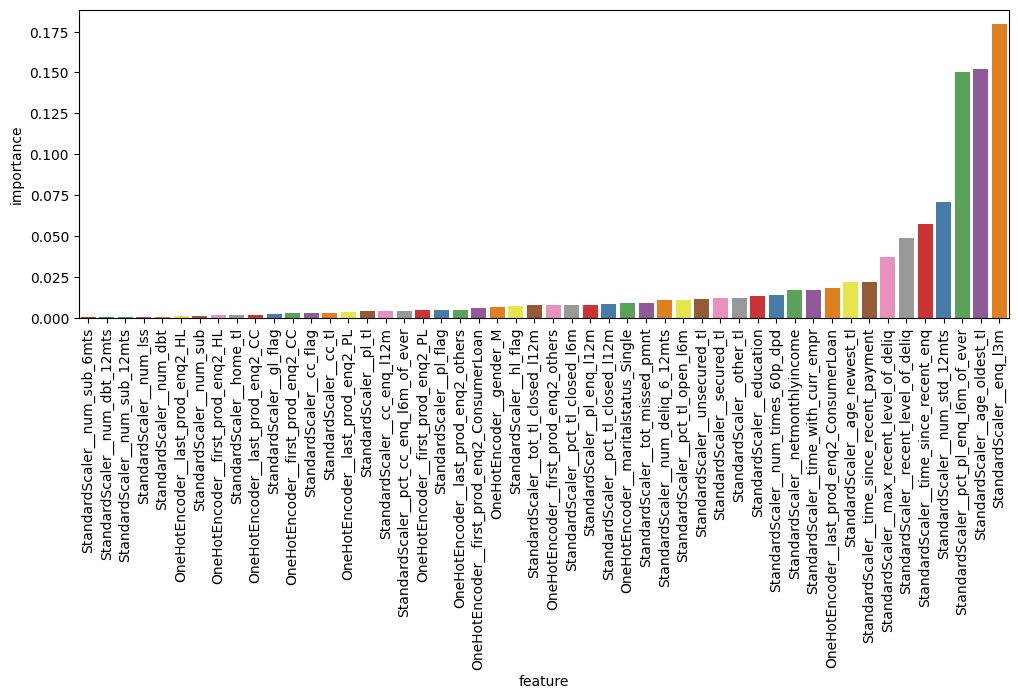

In [81]:
plt.figure(figsize=(12,4))
sns.barplot(data=feat_importances, x='feature', y='importance', palette='Set1')
plt.xticks(rotation=90)

plt.show()

In [82]:
X_test = preprocessor.transform(X_test)

In [83]:
test_data = pd.DataFrame(X_test, columns=column_names)
test_data.head()

,OneHotEncoder__maritalstatus_Single,OneHotEncoder__gender_M,OneHotEncoder__last_prod_enq2_CC,OneHotEncoder__last_prod_enq2_ConsumerLoan,OneHotEncoder__last_prod_enq2_HL,OneHotEncoder__last_prod_enq2_PL,OneHotEncoder__last_prod_enq2_others,OneHotEncoder__first_prod_enq2_CC,OneHotEncoder__first_prod_enq2_ConsumerLoan,OneHotEncoder__first_prod_enq2_HL,OneHotEncoder__first_prod_enq2_PL,OneHotEncoder__first_prod_enq2_others,StandardScaler__pct_tl_open_l6m,StandardScaler__pct_tl_closed_l6m,StandardScaler__tot_tl_closed_l12m,StandardScaler__pct_tl_closed_l12m,StandardScaler__tot_missed_pmnt,StandardScaler__cc_tl,StandardScaler__home_tl,StandardScaler__pl_tl,StandardScaler__secured_tl,StandardScaler__unsecured_tl,StandardScaler__other_tl,StandardScaler__age_oldest_tl,StandardScaler__age_newest_tl,StandardScaler__time_since_recent_payment,StandardScaler__max_recent_level_of_deliq,StandardScaler__num_deliq_6_12mts,StandardScaler__num_times_60p_dpd,StandardScaler__num_std_12mts,StandardScaler__num_sub,StandardScaler__num_sub_6mts,StandardScaler__num_sub_12mts,StandardScaler__num_dbt,StandardScaler__num_dbt_12mts,StandardScaler__num_lss,StandardScaler__recent_level_of_deliq,StandardScaler__cc_enq_l12m,StandardScaler__pl_enq_l12m,StandardScaler__time_since_recent_enq,StandardScaler__enq_l3m,StandardScaler__netmonthlyincome,StandardScaler__time_with_curr_empr,StandardScaler__cc_flag,StandardScaler__pl_flag,StandardScaler__pct_pl_enq_l6m_of_ever,StandardScaler__pct_cc_enq_l6m_of_ever,StandardScaler__hl_flag,StandardScaler__gl_flag,StandardScaler__education
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.744145,-0.464683,-0.533026,-0.620905,1.306922,-0.271961,-0.211349,0.715799,-0.140622,-0.390847,-0.446097,-0.672883,-0.638852,-0.393943,-0.265873,-0.308869,-0.204553,-0.169289,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,0.117145,-0.467799,-0.109620,-0.308210,0.574274,-0.339268,2.046029,2.186647,-0.28199,1.736240,-0.245176,0.790561
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.445515,-0.390847,-0.446097,-0.958080,-0.424751,-0.389216,-0.265873,-0.308869,-0.204553,-0.432840,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,1.754461,-0.478515,0.852031,-0.176053,-0.746792,-0.339268,-0.488752,0.826299,-0.28199,-0.575957,-0.245176,0.790561
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,0.011825,-0.681945,-0.446097,-0.411452,0.324602,0.565694,-0.265873,-0.308869,-0.204553,-0.432840,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,-0.428627,-0.549242,-0.109620,-0.220105,0.177954,-0.339268,-0.488752,-0.534049,-0.28199,1.736240,-0.245176,-1.504767
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.744145,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.445515,0.191349,-0.446097,-0.934313,-0.531801,-0.398670,-0.265873,-0.308869,-0.204553,-0.432840,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.256100,-0.264029,1.208689,-0.564244,1.332856,0.132313,-0.588264,-0.339268,-0.488752,2.186647,-0.28199,-0.575957,-0.245176,-0.357103
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.644660,-0.464683,-0.533026,-0.620905,-0.475615,-0.271961,-0.211349,-0.354709,-0.293068,-0.390847,-0.446097,0.277774,0.913380,1.170785,0.198361,-0.308869,-0.204553,-0.432840,-0.080038,-0.027751,-0.041776,-0.039302,-0.023151,-0.026897,-0.060255,-0.264029,-0.428627,-0.457083,-0.109620,-0.087948,0.151533,-0.339268,-0.488752,-0.534049,-0.28199,-0.575957,-0.245176,-0.357103


In [84]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [85]:
def evaluate_model(true, predicted):
    acc_score = round(accuracy_score(true, predicted)*100, 2)
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)

    return acc_score, cm, cr

In [86]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=4)
}

In [87]:
for model_name in models:

    model = models[model_name]
    model.fit(train_data, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate Train and Test dataset
    train_acc_score, train_cm, train_cr = evaluate_model(y_train, y_train_pred)
    test_acc_score, test_cm, test_cr = evaluate_model(y_test, y_test_pred)

    print(f">>>>>>>>>>>>>>> {model_name} <<<<<<<<<<<<<<<<<<< \n")

    print('>>> Model performance for Training set: \n')
    print(f" - Training Accuracy Score: {train_acc_score} \n")
    print(f" - Training Confusion Matrix: \n {train_cm} \n")
    print(f" - Training Classification Report: \n {train_cr} \n")

    print('>>> Model performance for Test set: \n')
    print(f" - Test Accuracy Score: {test_acc_score} \n")
    print(f" - Test Confusion Matrix: \n {test_cm} \n")
    print(f" - TestClassification Report: \n {test_cr} \n")

>>>>>>>>>>>>>>> DecisionTreeClassifier <<<<<<<<<<<<<<<<<<< 

>>> Model performance for Training set: 

 - Training Accuracy Score: 100.0 

 - Training Confusion Matrix: 
 [[ 3232     0     0     0]
 [    0 17137     0     0]
 [    0     0  4254     0]
 [    0     0     0  3559]] 

 - Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3232
           1       1.00      1.00      1.00     17137
           2       1.00      1.00      1.00      4254
           3       1.00      1.00      1.00      3559

    accuracy                           1.00     28182
   macro avg       1.00      1.00      1.00     28182
weighted avg       1.00      1.00      1.00     28182
 

>>> Model performance for Test set: 

 - Test Accuracy Score: 69.88 

 - Test Confusion Matrix: 
 [[1177  415   78    6]
 [ 382 6677 1061  195]
 [  53  964  746  423]
 [   0  196  408 1101]] 

 - TestClassification Report: 
               preci

XGBoost is giving best results. Let's do some HP tuning to find the best combination for HP.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {
  'alpha'           : [1, 10, 100],
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'n_estimators'    : [10,50,100]
}

In [92]:
xgbC = XGBClassifier(objective='multi:softmax', num_class=4, device="cuda")

In [93]:
grid_search = GridSearchCV(estimator=xgbC, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(train_data, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.609 total time=   0.7s
[CV 2/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.609 total time=   0.3s
[CV 3/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.608 total time=   0.2s
[CV 4/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.609 total time=   0.3s
[CV 5/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.608 total time=   0.4s
[CV 1/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.608 total time=   0.9s
[CV 2/5] END alpha=1, colsample_bytree=0.1, learning_rate=0.001, max_depth=3, n_estimators=50;, score=0.608 total time=   0.7s
[CV 3/5] END alpha=1, colsample_bytree=0.1, lea

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             param_grid={'alpha': [1, 10, 100],
                         'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=3)

In [94]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 1, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [95]:
best_estimator = grid_search.best_estimator_

In [96]:
best_estimator_preds_train_data = best_estimator.predict(train_data)
best_estimator_preds_test_data = best_estimator.predict(test_data)

In [97]:
train_acc_score, train_cm, train_cr = evaluate_model(y_train, best_estimator_preds_train_data)
test_acc_score, test_cm, test_cr = evaluate_model(y_test, best_estimator_preds_test_data)

In [98]:
print(">>>>>>>>>>>>>>> {Best XGB Classifier} <<<<<<<<<<<<<<<<<<< \n")

print('>>> Model performance for Training set: \n')
print(f" - Training Accuracy Score: {train_acc_score} \n")
print(f" - Training Confusion Matrix: \n {train_cm} \n")
print(f" - Training Classification Report: \n {train_cr} \n")

print('>>> Model performance for Test set: \n')
print(f" - Test Accuracy Score: {test_acc_score} \n")
print(f" - Test Confusion Matrix: \n {test_cm} \n")
print(f" - TestClassification Report: \n {test_cr} \n")

>>>>>>>>>>>>>>> {Best XGB Classifier} <<<<<<<<<<<<<<<<<<< 

>>> Model performance for Training set: 

 - Training Accuracy Score: 81.21 

 - Training Confusion Matrix: 
 [[ 2618   614     0     0]
 [  304 16218   511   104]
 [   96  2263  1304   591]
 [    2   340   469  2748]] 

 - Training Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      3232
           1       0.83      0.95      0.89     17137
           2       0.57      0.31      0.40      4254
           3       0.80      0.77      0.78      3559

    accuracy                           0.81     28182
   macro avg       0.77      0.71      0.73     28182
weighted avg       0.79      0.81      0.79     28182
 

>>> Model performance for Test set: 

 - Test Accuracy Score: 77.59 

 - Test Confusion Matrix: 
 [[1262  414    0    0]
 [ 196 7738  311   70]
 [  47 1260  521  358]
 [   1  176  278 1250]] 

 - TestClassification Report: 
               precis